# Matlab example
Purpose of this notebook is to try to replicate results of the MATLAB example:
https://www.mathworks.com/help/predmaint/ug/Rolling-Element-Bearing-Fault-Diagnosis.html

### Imports and Configuration

In [1]:
# --- Standard Library ---
import os
import sys
from pathlib import Path
import glob

# --- Third-Party Libraries ---
import numpy as np
import scipy
import matplotlib.pyplot as plt

# --- Internal Project Modules ---
# Ensure the notebook's directory is in sys.path so imports work
sys.path.append(str(Path().resolve().parent))
from openconmo.kurtogram import fast_kurtogram, plot_kurtogram
from openconmo.benchmark_methods import envelope
import openconmo.utils as ut

### Raw Signal: Inner Race Fault

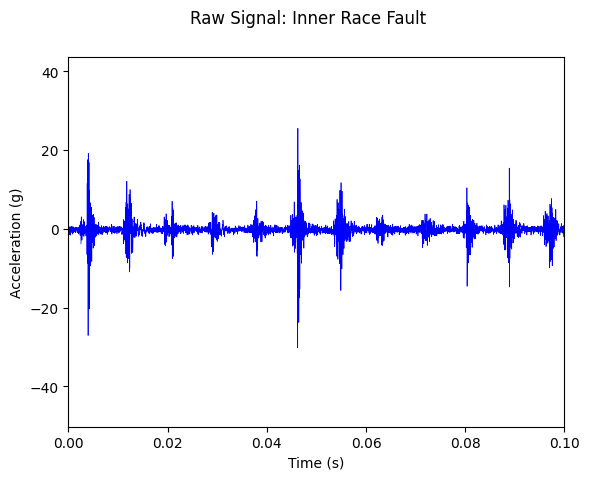

In [2]:
mat_files = glob.glob("../data/matlab_example_data/inner_fault.mat", recursive=True)

fs = 48828
signal = scipy.io.loadmat(mat_files[0])['xInner'].ravel()
time = np.linspace(0, len(signal)/fs, len(signal))
plt.plot(time, signal, c="b", linewidth=0.5)
plt.xlim(0, 0.1)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (g)")
plt.suptitle("Raw Signal: Inner Race Fault")
plt.show()


### Kurtogram and Spectral Kurtosis for Band Selection

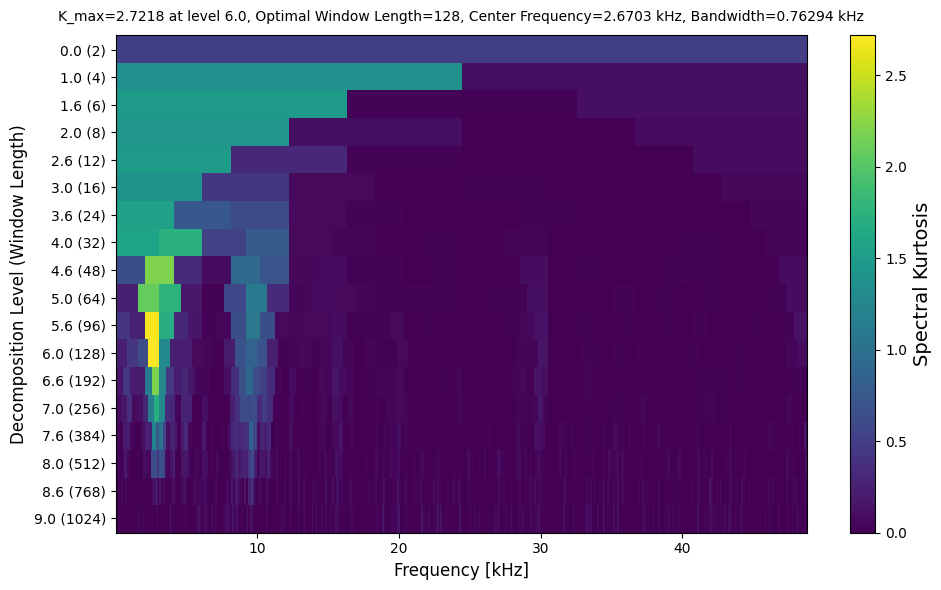

In [3]:
signal = scipy.io.loadmat('../data/matlab_example_data/outer_fault.mat')['xOuter'].squeeze()
samplingRate = 97656  # Define sampling rate

# use draw_kurtogram function to plot the kurtogram
plot_kurtogram(signal, samplingRate, nlevel=9, verbose=False)